**EDA DEIENE:**
**Navegando el Ecosistema de Apps: EDA en Google Play**

¿Cuáles son las categorías con apps mejor calificadas?

¿Hay alguna relación entre las calificaciones y el número de descargas? 

¿Las apps gratuitas tienen mejores calificaciones que las de pago?

¿Cuál es la correlación entre el número de instalaciones y el precio?

¿Las apps que más duran en el mercado tienen mejores calificaciones?

¿Qué factores influyen más en las calificaciones? y ¿Qué factores influyen en las apps más exitosas?

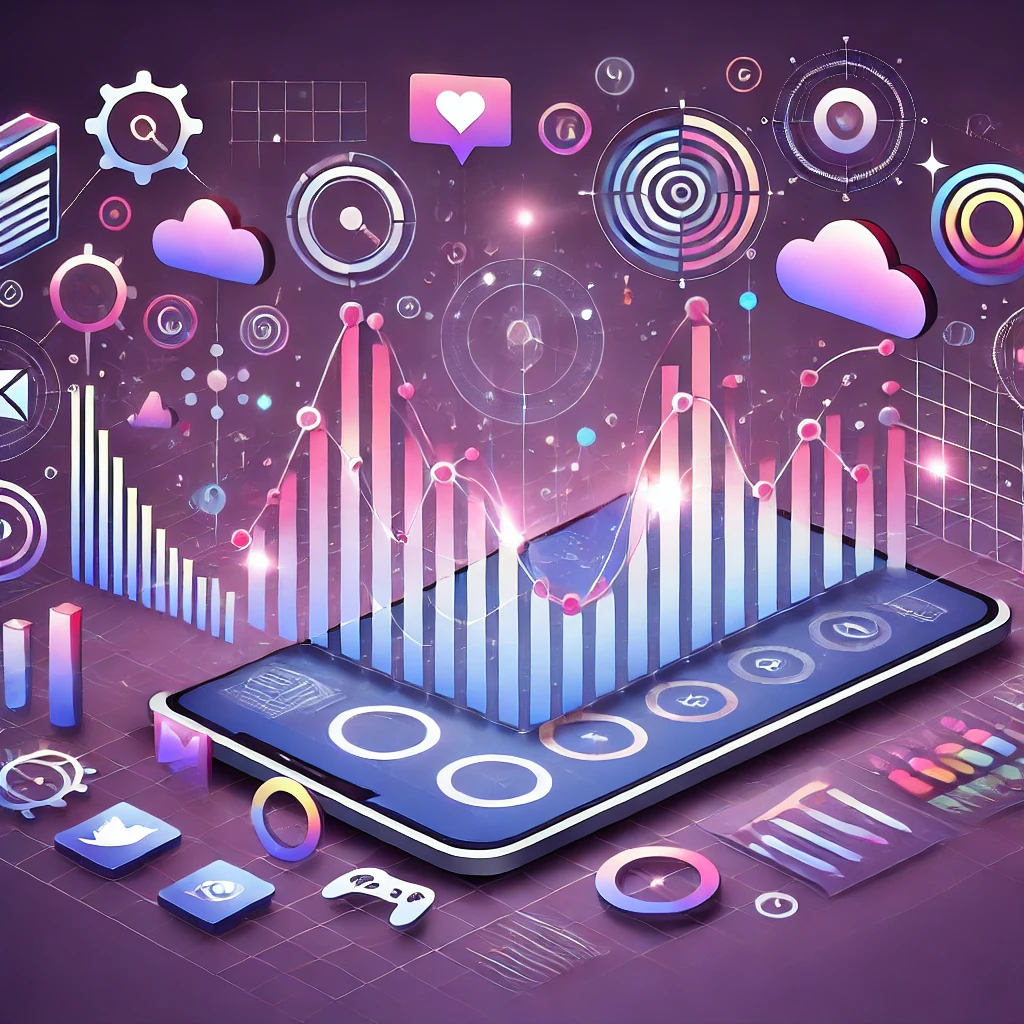



In [1]:
#IMPORTACIÓN DE LIBRERÍAS NECESARIAS: 

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#COMPROBACIÓN DIRECTORIO (en más de una ocasión me ha dado problemas):

current_directory = os.getcwd()
print("El directorio actual es:", current_directory)

os.chdir('C:/Users/Marian/Desktop/DS/ONLINE_DS_THEBRIDGE_DEIENE/EDA')  
print("Nuevo directorio de trabajo:", os.getcwd())


El directorio actual es: c:\Users\Marian\Desktop\DS\EDA_APPS_GOOGLEPLAYSTORE\EDA
Nuevo directorio de trabajo: C:\Users\Marian\Desktop\DS\ONLINE_DS_THEBRIDGE_DEIENE\EDA


**1. CARGAMOS LOS DATOS**

In [2]:
#DEFINICIÓN DE RUTA A LOS ARCHIVOS:

apps_file = './googleplaystore.csv'
reviews_file = './googleplaystore_user_reviews.csv'

#CARGAR LOS DATASETS:

df_apps = pd.read_csv(apps_file)
df_reviews = pd.read_csv(reviews_file)

In [3]:
# EXPLORAR LAS PRIMERAS FILAS DE LOS DATASETS:

print("Datos de apps:")
df_apps.head(10)

Datos de apps:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
print("Datos de reviews:")
df_reviews.head(10)

Datos de reviews:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [5]:
#EXPLORAR LA ESTRUCTURA DE CADA DATASET:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Observo que rating, type, content rating y ambas columnas de versiones tienen nulos.
Además, los tipos de datos de práticamente todas las columnas son de tipo object.

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Todas las columnas menos 'App' tienen nulos.

**2. LIMPIEZA DE DATOS: ELIMINACIÓN DE NULOS Y DUPLICADOS**

In [7]:
df_apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
'''Antes de nada, dado que casi todas las columnas tienen datos de tipo objeto, 
voy a comprobar qué tipo de datos "mezclados" tienen las columnas clave que quiero limpiar:'''

print(df_apps['Price'].unique())
print(df_apps['Installs'].unique())
print(df_apps['Reviews'].unique())

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+'

En Price: Casi todos los precios incluyen un signo de dólar y además, hay un string 'Everyone'.

En Installs: Los números contienen comas en vez de puntos y además contienen un '+'. 

En Reviews: La columna reviews parece "correcta", aunque en la evaluación inicial su tipo de datos está categorizado como object. Veremos

In [9]:
#1. Limpieza y eliminación de nulos en df_apps:

# Rating:

df_apps['Rating'] = df_apps['Rating'].fillna(df_apps['Rating'].median())
df_apps['Rating'].isnull().sum()


np.int64(0)

In [10]:
# Price: Sólo hay que limpiarla, ya que no tenía nulos
df_apps = df_apps[df_apps['Price'] != 'Everyone']
df_apps['Price'] = df_apps['Price'].str.replace('$', '').astype(float)
df_apps.Price.unique()


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [11]:
# Installs: Sólo hay que limpiarla, ya que no tenía nulos

df_apps['Installs'] = (df_apps['Installs'].str.replace('[+,]','', regex=True)
                       .replace('Free', '0').astype(float))
df_apps.Installs.unique()


array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [12]:
# Reviews: Sólo hay que limpiarla, ya que no tenía nulos.

'''Sin embargo, es una columna de tipo object. Como tiene muchos valores únicos, con el método unique es
difícil detectar qué valoes no numéricos o caracteres "raros" tiene,
por lo tanto voy a cmabiar de método para limpiar la columa:'''

wrong_reviews = df_apps[pd.to_numeric(df_apps['Reviews'], errors = 'coerce').isna()]

print(wrong_reviews['Reviews'].unique())



[]


La primera vez que ejecuté el código de la celda superior sí que me apareció un carácter ['M']. Después, a pesar de haber reiniciado el kernel para comprobar que efectivamente era así, nunca más me ha vuelto a aparecer. 
Aún así, mantengo el código superior

In [13]:
df_apps['Reviews'] = (df_apps['Reviews'].str.replace('M','e6').astype(float))
print(df_apps.Reviews.unique())

[1.59000e+02 9.67000e+02 8.75100e+04 ... 6.03000e+02 1.19500e+03
 3.98307e+05]


Por útimo, para saber la "edad" de cada aplicación, vamos a pasar la columna "Last Updated" a datetime y calcular su edad:

In [14]:
# Last Updated 
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'], errors = 'coerce')


In [15]:
age = (pd.Timestamp.now() - df_apps['Last Updated']).dt.days
age

0        2538
1        2530
2        2332
3        2386
4        2374
         ... 
10836    2704
10837    2358
10838    2890
10839    3622
10840    2339
Name: Last Updated, Length: 10840, dtype: int64

In [16]:
df_apps['App Age (years)'] = age / 365
df_apps['App Age (years)']

0        6.953425
1        6.931507
2        6.389041
3        6.536986
4        6.504110
           ...   
10836    7.408219
10837    6.460274
10838    7.917808
10839    9.923288
10840    6.408219
Name: App Age (years), Length: 10840, dtype: float64

In [17]:
# Type: tenía un único nulo según la primera exploración

df_apps['Type'].isna().sum()

np.int64(1)

In [18]:
# Con 'loc' asocio valores a filas específicas:

df_apps.loc[df_apps['Type'].isna() & (df_apps['Price'] == 0), 'Type'] = 'Free'
df_apps.loc[df_apps['Type'].isna() & (df_apps['Price'] > 0), 'Type'] = 'Paid'

In [19]:
print(f"Valores nulos en 'Type' ahora: {df_apps['Type'].isna().sum()}")

Valores nulos en 'Type' ahora: 0


In [20]:
# Eliminar duplicados
duplicated_rows = df_apps.duplicated(keep=False)

total_dup = duplicated_rows.sum()
total_dup

np.int64(893)

In [21]:
duplicates = df_apps[duplicated_rows]
duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Age (years)
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842.0,37M,5000000.0,Free,0.0,Everyone,Books & Reference,2018-06-25,5.0.6,4.0 and up,6.490411
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730.0,Varies with device,50000000.0,Free,0.0,Everyone,Business,2018-04-02,Varies with device,Varies with device,6.720548
193,Google My Business,BUSINESS,4.4,70991.0,Varies with device,5000000.0,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,6.410959
204,Box,BUSINESS,4.2,159872.0,Varies with device,10000000.0,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,6.391781
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37M,10000000.0,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,6.421918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610.0,Varies with device,10000000.0,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6.709589
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370.0,Varies with device,1000000.0,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6.375342
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017.0,Varies with device,100000000.0,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,6.484932
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123.0,86M,10000.0,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,6.556164


In [22]:
df_apps = df_apps.drop_duplicates()


In [23]:
duplicated_rows = df_apps.duplicated(keep=False)

total_dup = duplicated_rows.sum()
total_dup

np.int64(0)

In [24]:
# Limpieza y eliminación de nulos y duplicados en df_reviews:

# En este caso, únicamente se van a eliminar directamente los nulos ya que no
# tiene sentido sustuirlos.

df_reviews = df_reviews.dropna(subset=['Translated_Review', 'Sentiment'])


In [25]:
#Comprobamos y eliminamos los duplicados de df_reviews:

duplicated_rows_2 = df_reviews.duplicated(keep=False)

total_dup_2 = duplicated_rows_2.sum()
total_dup_2

np.int64(13173)

In [26]:
duplicates_2 = df_reviews[duplicated_rows_2]
duplicates_2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64073,Hotels.com: Book Hotel Rooms & Find Vacation D...,The new system showing Top 10 whole search res...,Negative,-0.032727,0.670909
64075,Hotels.com: Book Hotel Rooms & Find Vacation D...,Mobile currently crashing. Their international...,Neutral,0.000000,0.200000
64112,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.700000,0.600000
64113,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.700000,0.600000


In [27]:
df_reviews = df_reviews.drop_duplicates()

In [28]:
duplicated_rows_2 = df_reviews.duplicated(keep=False)

total_dup_2 = duplicated_rows_2.sum()
total_dup_2

np.int64(0)

In [29]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


No voy a utilizar el segundo dataset, correspondiente al DataFrame df_reviews porque prácticamente triplica el número de entradas del Df correspondiente a df_apps, y la información no me parece tan valiosa.

**3. ANÁLISIS UNIVARIANTE**

**3.1 VARIABLES NUMÉRICAS**

1. Resumen estadístico con describe
2. Histogramas: vsualizan la distribución de una variable numérica

In [30]:
#Antes de comenzar con el análisis univariante, vamos a hacer la clasificación de las variables:

categoricas = [col for col in df_apps if df_apps[col].dtype == 'object']
numericas = [col for col in df_apps if df_apps[col].dtype != 'object']

print(f"Variables categoricas: {categoricas}")
print(f"Variables numericas: {numericas}")

Variables categoricas: ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
Variables numericas: ['Rating', 'Reviews', 'Installs', 'Price', 'Last Updated', 'App Age (years)']


Variables numéricas: Exploraremos su distribución y estadísticas.

Utilizaremos histogramas, boxplots, y descripción estadística.
Variables categóricas: Exploraremos sus frecuencias y proporciones.

Utilizaremos gráficos de barras y tablas de frecuencia.

In [31]:
#3.1 VARIABLES NUMÉRICAS:
#Las variables numéricas clave son Rating, Installs, Price y App Age creada antes.

numericas_clave = ['Rating', 'Price', 'Installs', 'App Age (years)']

df_apps[numericas_clave].describe()

,Rating,Price,Installs,App Age (years)
count,10357.000000,10357.000000,1.035700e+04,10357.000000
mean,4.203737,1.030800,1.415776e+07,7.100294
std,0.485594,16.278625,8.023955e+07,1.092132
min,1.000000,0.000000,0.000000e+00,6.369863
25%,4.100000,0.000000,1.000000e+03,6.424658
50%,4.300000,0.000000,1.000000e+05,6.589041
75%,4.500000,0.000000,1.000000e+06,7.298630
max,5.000000,400.000000,1.000000e+09,14.591781


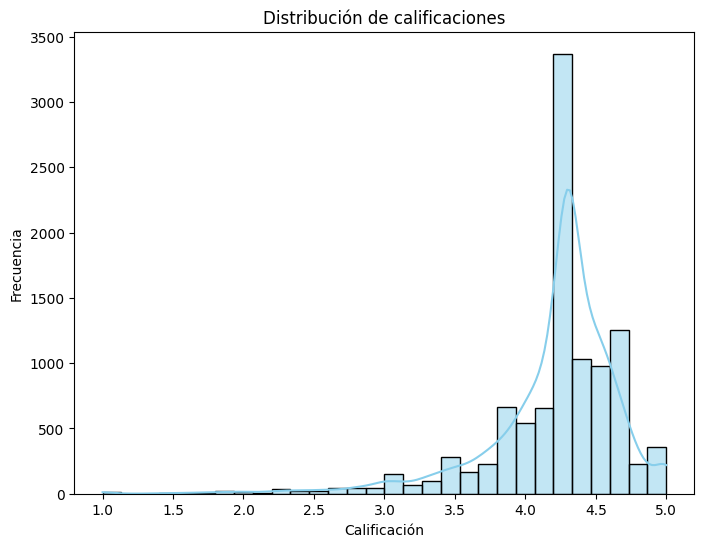

In [32]:
# Dsitribución de Ratings:

plt.figure(figsize=(8,6))
sns.histplot(df_apps['Rating'], bins = 30, kde = True, color = 'skyblue')
plt.title('Distribución de calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de las aplicaciones tienen una calificación entre 4 y 5.

c:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


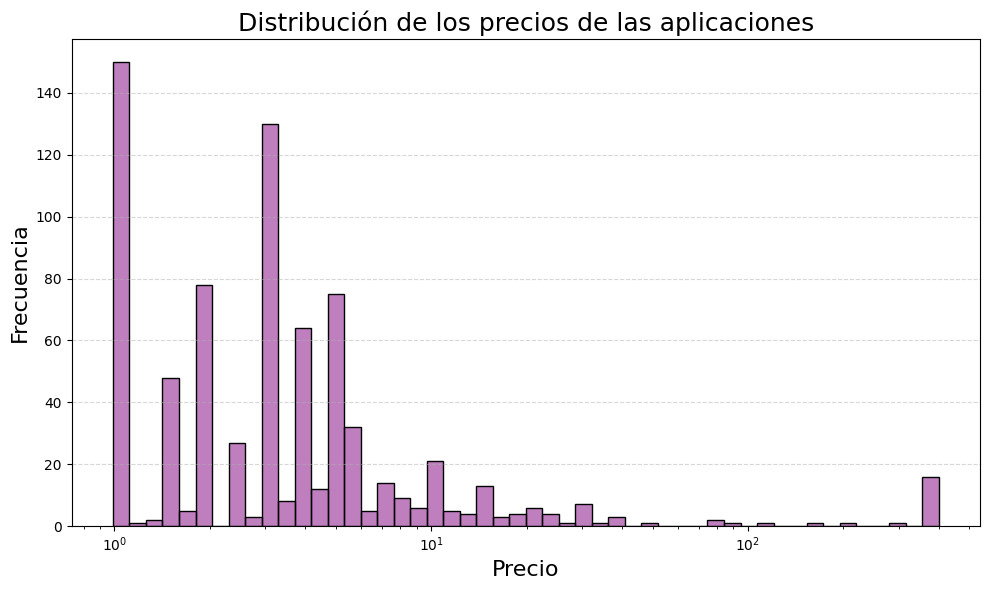

In [33]:
# Dsitribución de Price:

plt.figure(figsize=(10,6))
sns.histplot(df_apps['Price'], bins = 50, kde = True, color = 'purple', log_scale = True)
plt.title('Distribución de los precios de las aplicaciones', fontsize=18)
plt.xlabel('Precio', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

En su mayoría son aplicaciones gratuitas.

c:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


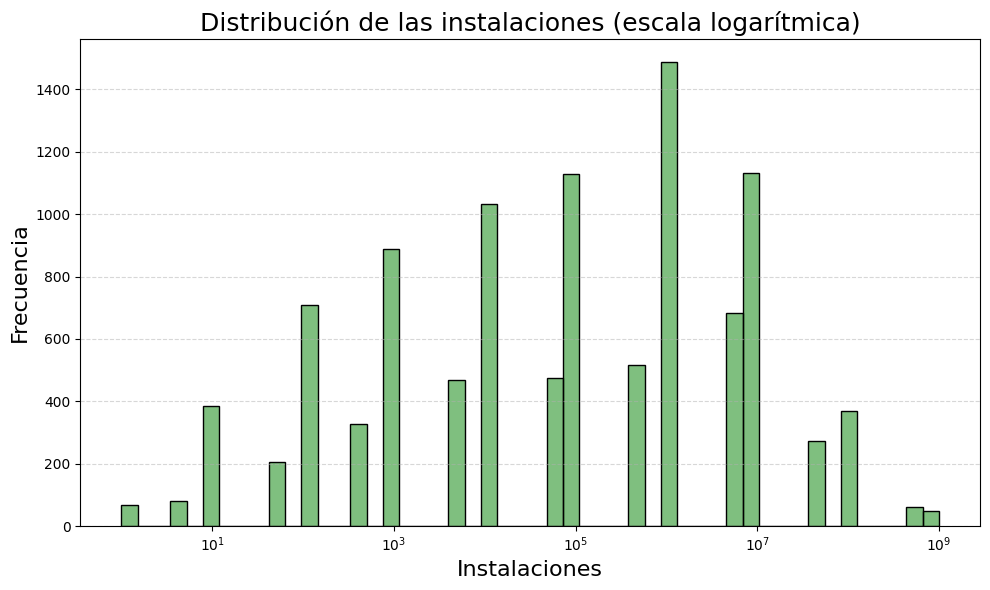

In [34]:
# Dsitribución de Installs:

plt.figure(figsize=(10,6))
sns.histplot(df_apps['Installs'], bins = 50, kde = True, color = 'green', log_scale= True)
plt.title('Distribución de las instalaciones (escala logarítmica)', fontsize=18)
plt.xlabel('Instalaciones', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

La mayoría tienen muy pocas descargas o instalaciones mientras que hay un par de pequeños picos de instalaciones, las cuales podrían corresponder a aplicaciones muy famosas como instagram, facebook...

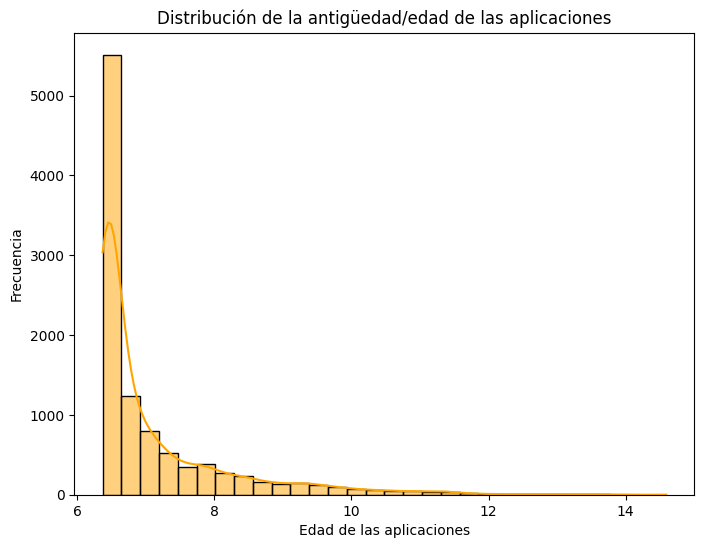

In [35]:
# Dsitribución de App Age(Years):

plt.figure(figsize=(8,6))
sns.histplot(df_apps['App Age (years)'], bins = 30, kde = True, color = 'orange')
plt.title('Distribución de la antigüedad/edad de las aplicaciones')
plt.xlabel('Edad de las aplicaciones')
plt.ylabel('Frecuencia')
plt.show()

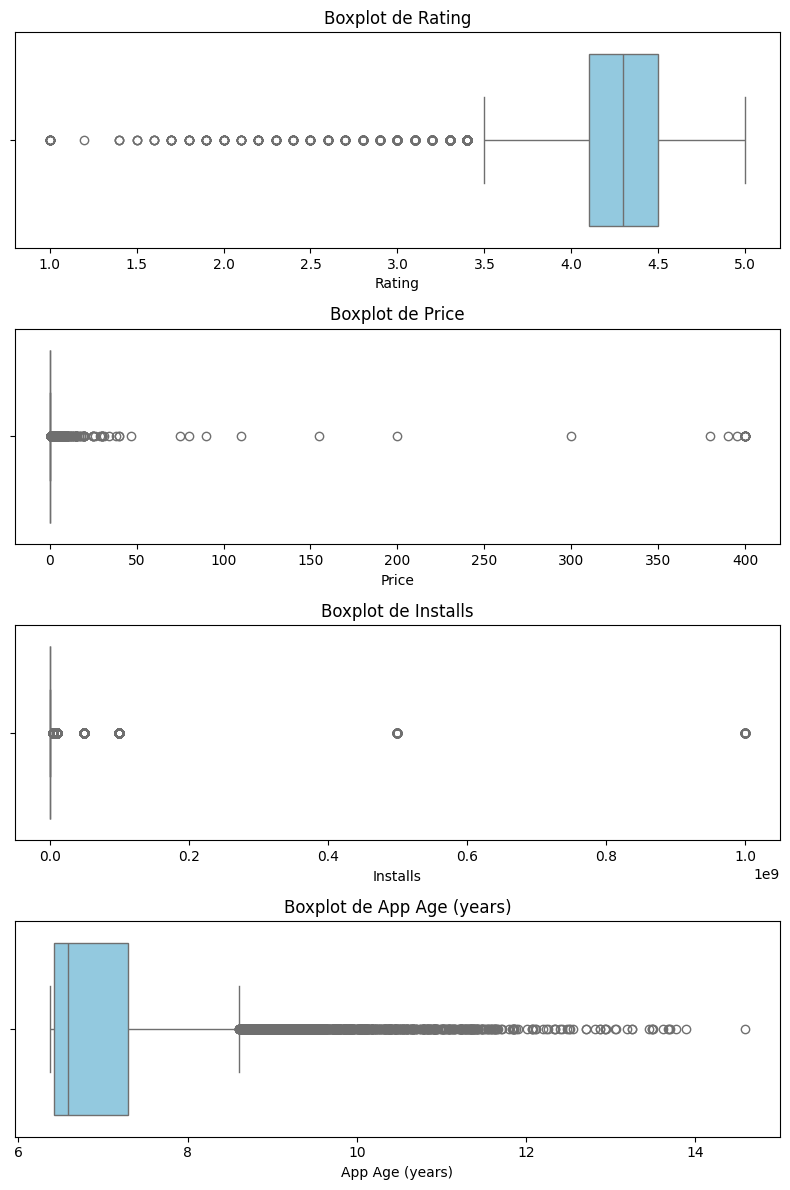

In [36]:
# Boxplot para las variables numéricas clave:

fig, axes = plt.subplots(len(numericas_clave), 1, figsize=(8,12))

for ax, var in zip(axes, numericas_clave):
    sns.boxplot(x=df_apps[var], ax=ax, color = 'skyblue')
    ax.set_title(f"Boxplot de {var}")
    ax.set_xlabel(var)

plt.tight_layout()
plt.show()


- Ratings: La mayoría de las apps tienen buenas valoraciones (entre 4 y 4.5), siendo la mediana aprox 4.25, pero se dan outliers con valores de 1 y 2, es decir, apps con peores valoraciones.

- Price: La mayorías de las apps son gratuitas. Vemos alguna anomalía como el outlier en 400, podría tratarse de un error dado que no es común que una app pueda llegar a costar 300-400$.

- Installs: La gran mayorías de las apps se instalan muy poco y de hecho, la mediana está muy baja en comparación con los valores extremos. La distribución está muy sesgada. Se dan apps muy popularess que dominan claramente el mercado.

- App Age (Years): En general, las apps son bastante "jóvenes", ya que tienen todas menos de 8 años de antigüedad. Los outliers son apps con más de 10 años de edad. Esto puede sugerir que son apps que llevan ya mucho tiempo en el mercado y se trata de apps confiables y establecidas. 

In [37]:
#3.2 VARIABLES CATEGÓRICAS:

categoricas_clave = ['Category', 'Type', 'Content Rating']

for var in categoricas_clave:
    print(df_apps[var].value_counts())

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64
Type
Free    9592
Paid     765
Name: coun

Voy a mirar la frecuencia total de Type y Content Rating individualmente, ya que se pierde la información arriba

In [38]:
df_apps.Type.value_counts()

Type
Free    9592
Paid     765
Name: count, dtype: int64

In [39]:
df_apps['Content Rating'].value_counts()

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

En Content Rating hay clasificaciones que se pueden agrupar:

In [40]:
df_apps['Content Rating'] = df_apps['Content Rating'].replace({
    'Everyone 10+': 'Everyone',
    'Mature 17+': 'Adults',
    'Adults only 18+': 'Adults',
})

df_apps['Content Rating'].value_counts()

Content Rating
Everyone    8759
Teen        1146
Adults       450
Unrated        2
Name: count, dtype: int64

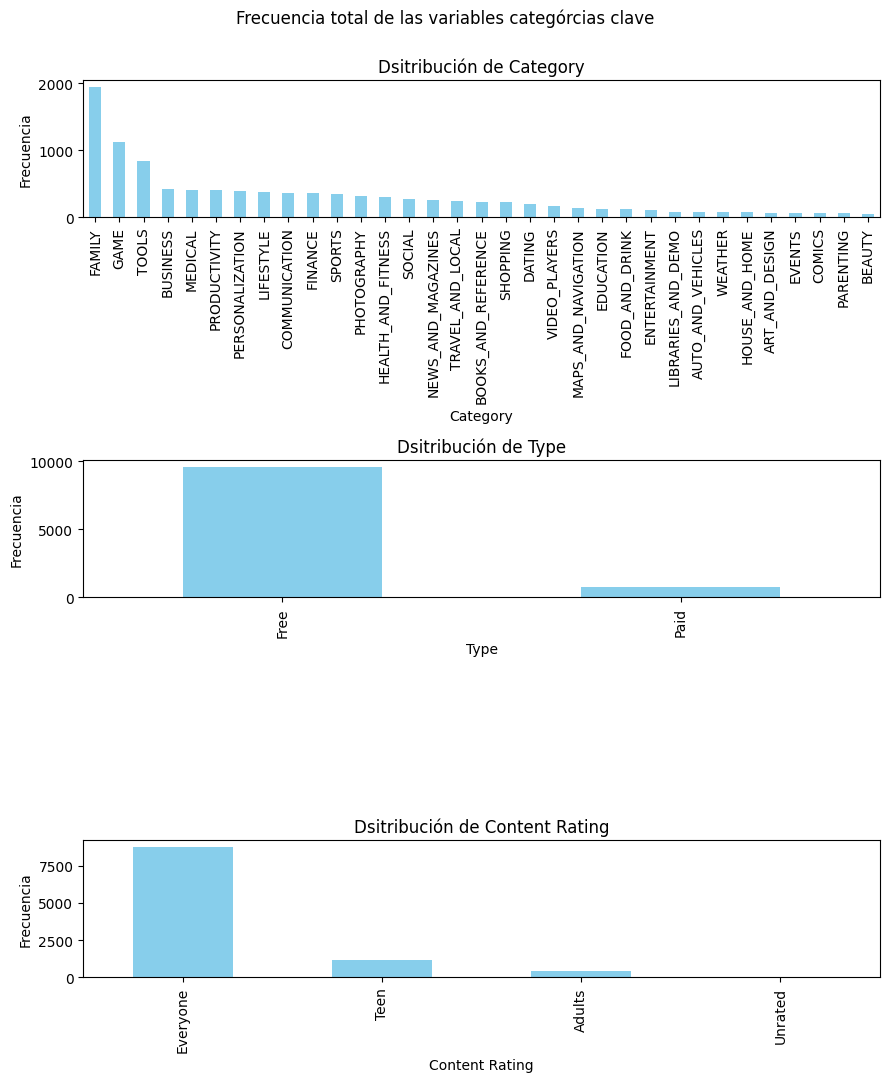

In [41]:
fig, axes = plt.subplots(len(categoricas_clave), 1, figsize=(9,11))
fig.suptitle('Frecuencia total de las variables categórcias clave')

for ax,var in zip(axes, categoricas_clave):
    frec = df_apps[var].value_counts()
    frec.plot(kind = 'bar', ax=ax, color='skyblue')
    ax.set_title(f"Dsitribución de {var}")
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis ='x', rotation = 90)

plt.tight_layout(rect=[0,0,1,0.98])
plt.show()

Vamo que la mayoría de las apps son gratuitas, como ya habíamos comprobado anteriorments, además están categorizadas para todos los públicos, lo cual tiene sentido teniendo en cuenta que las apps más utilizadas son de categoría familiar o de juegos.

In [42]:
#Análisis univariante dataset reviews: refrescando la memoria:

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [43]:
categoricas_rev = ['Sentiment', 'Translated_Review']
numericas_rev = ['Sentiment_Polarity', 'Sentiment_Subjectivity']

In [44]:
# Análisis numéricas clave:

df_reviews[numericas_rev].describe()


,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


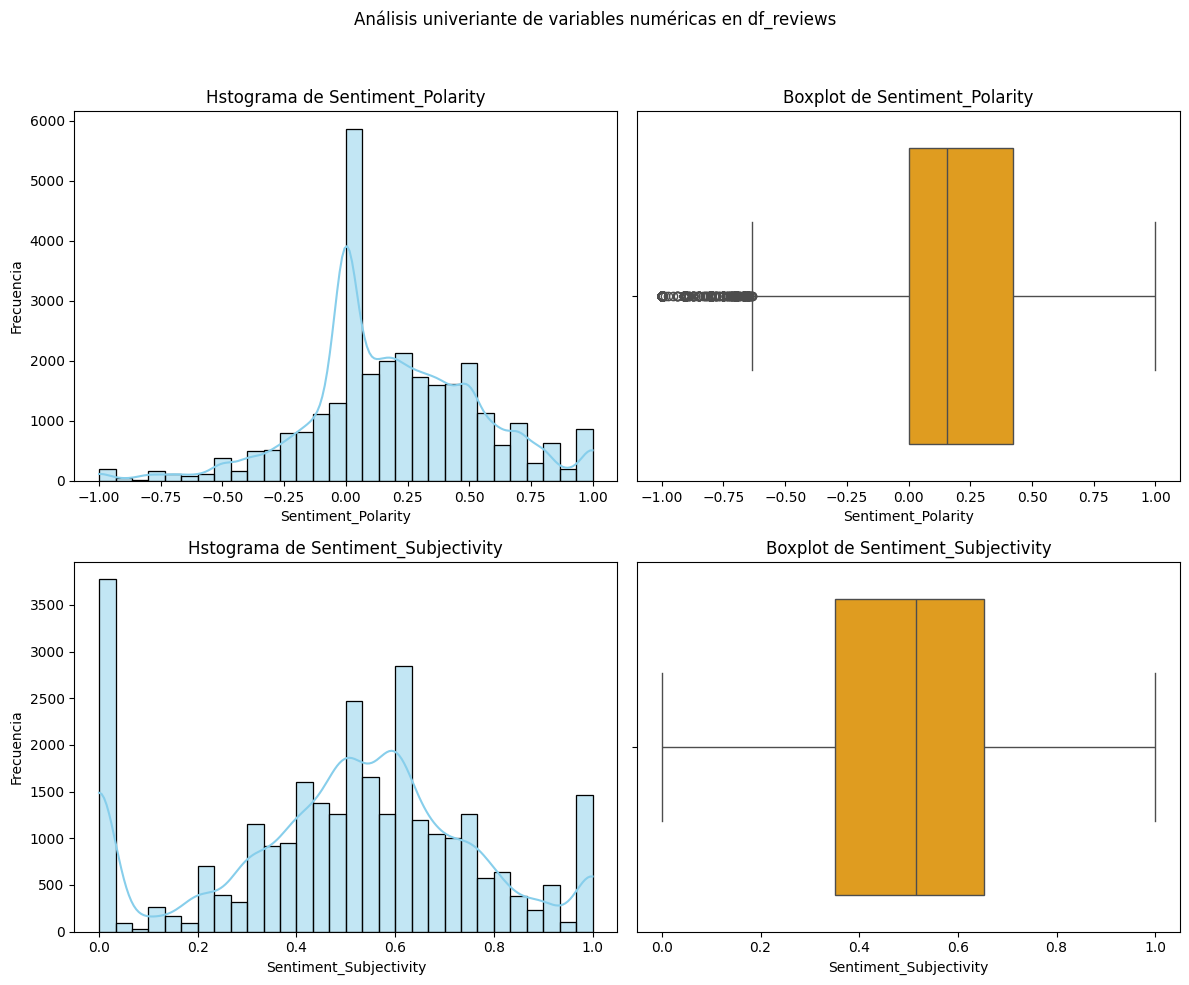

In [45]:
fig, axes = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Análisis univeriante de variables numéricas en df_reviews')

for i, var in enumerate(numericas_rev):
    sns.histplot(df_reviews[var], bins=30, kde=True, ax=axes[i,0], color = 'skyblue')
    axes[i,0].set_title(f"Hstograma de {var}")
    axes[i,0].set_xlabel(var)
    axes[i,0].set_ylabel('Frecuencia')

    sns.boxplot(x=df_reviews[var], ax=axes[i,1], color='orange')
    axes[i,1].set_title(f"Boxplot de {var}")
    axes[i,1].set_xlabel(var)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


- Sentiment_Polarity representa cómo de positiva o negativa es una reseña (de -1 a 1). En este caso se que la gran mayoría de reseñas se sitúan en el cero, es decir, ni positiva ni negativa, a pesar de que hay varios outliers con valoraciones muy negativas. Habría que ver si esto coincide con el otro dataset df_apps.
- Sentiment_Subjectivity representa cómo de objetiva o subjetiva es esa reseña ( de 0 a 1). 


In [46]:
# Análisis categóricas clave:

for var in categoricas_rev:
    print(df_reviews[var].value_counts())


Sentiment
Positive    19015
Negative     6321
Neutral      4356
Name: count, dtype: int64
Translated_Review
Good                                 137
Nice                                 105
Great                                 90
Love                                  81
I love                                55
                                    ... 
An excellent A useful                  1
I found lot wealth form health...      1
Because I found important.             1
Healthy Eating                         1
Best idea us                           1
Name: count, Length: 27994, dtype: int64


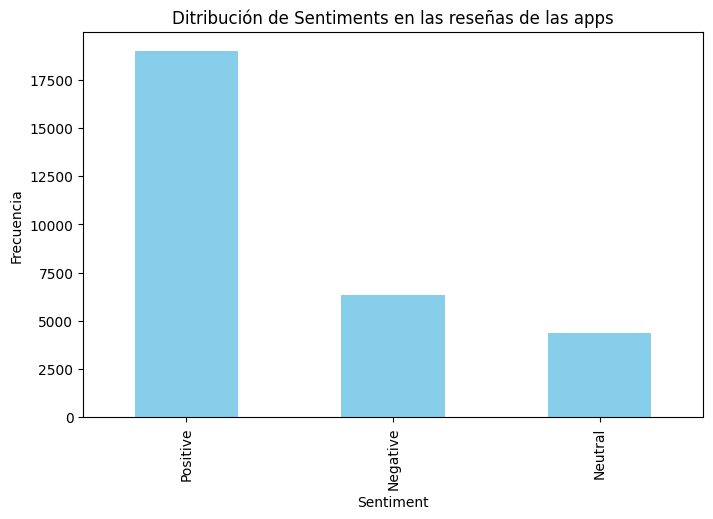

In [47]:
plt.figure(figsize=(8,5))
df_reviews['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Ditribución de Sentiments en las reseñas de las apps')
plt.xlabel('Sentiment')
plt.ylabel('Frecuencia')
plt.show()


In [48]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


**2. ANÁLISIS BIVARIANTE**

¿Cuáles son las categorías con las apps mejor calificadas?

In [49]:
# Voy a calcular las medianas de la calificación por categoría y seleccionaré las top 10:

top_cat = df_apps.groupby('Category')['Rating'].median().nlargest(10).index
top_cat

Index(['ART_AND_DESIGN', 'EDUCATION', 'HEALTH_AND_FITNESS', 'COMICS',
       'PARENTING', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMMUNICATION'],
      dtype='object', name='Category')

C:\Users\Marian\AppData\Local\Temp\ipykernel_3684\3418101051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_apps[df_apps['Category'].isin(top_cat)],


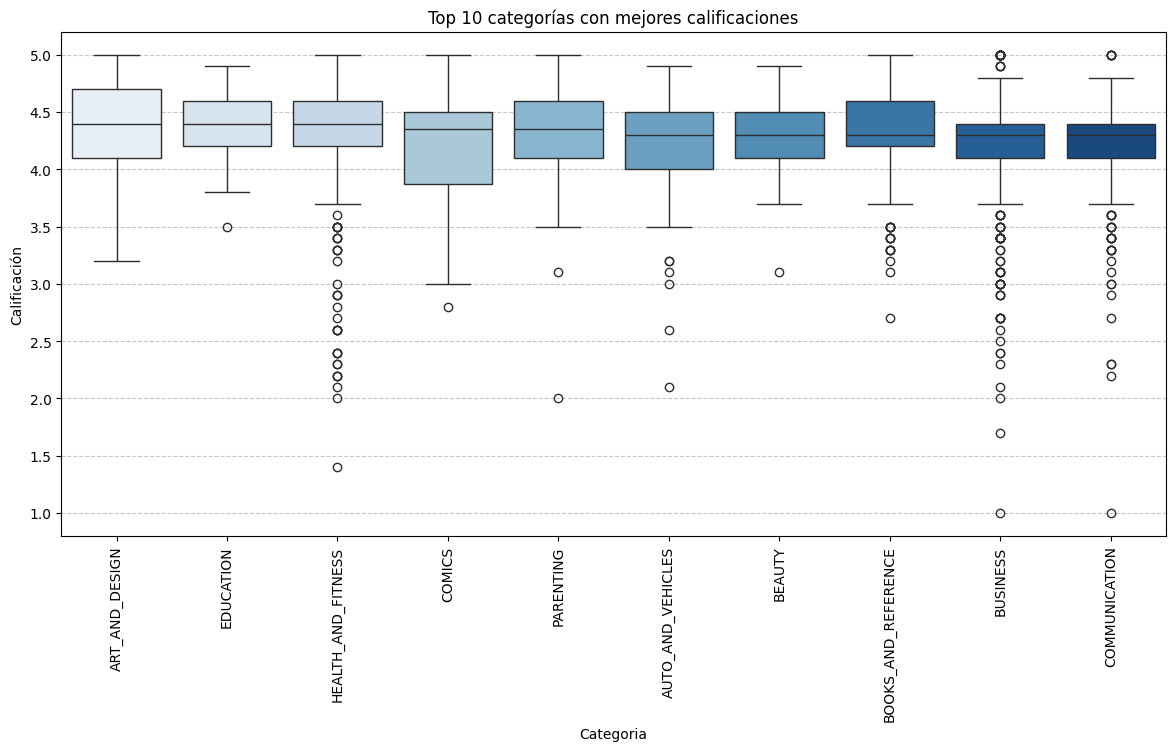

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_apps[df_apps['Category'].isin(top_cat)],
            x = 'Category',
            y = 'Rating',
            order = top_cat,
            palette = 'Blues')
plt.title('Top 10 categorías con mejores calificaciones')
plt.xlabel('Categoria')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

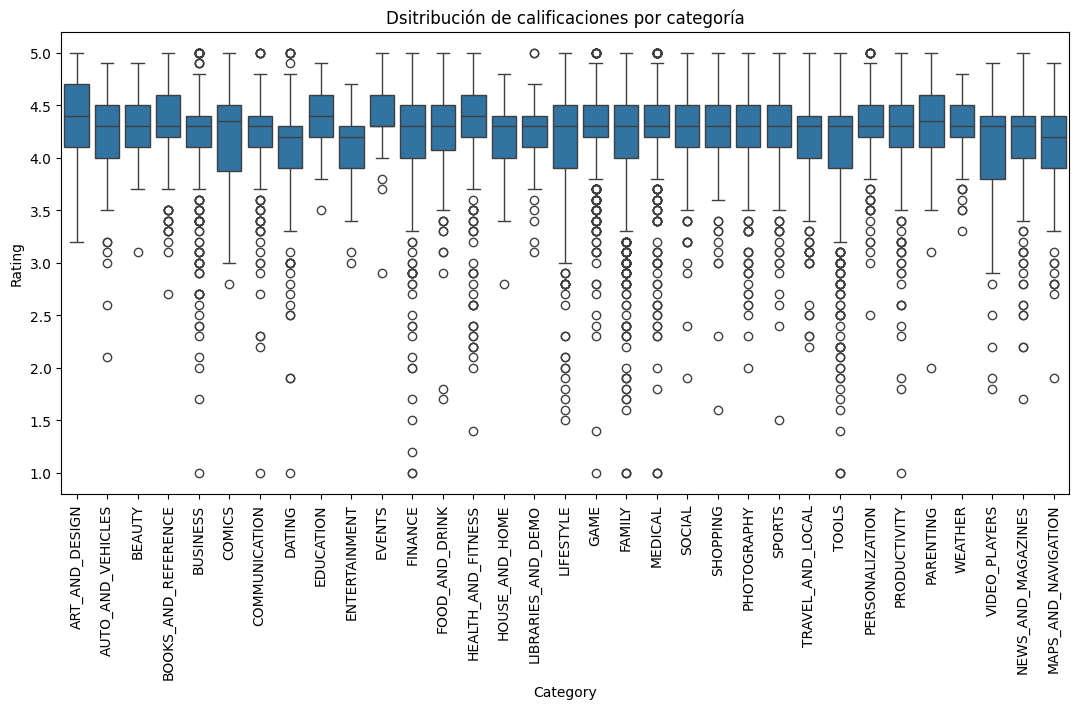

In [51]:
plt.figure(figsize=(13,6))
sns.boxplot(data=df_apps, x= 'Category', y='Rating')
plt.title('Dsitribución de calificaciones por categoría')
plt.xticks(rotation=90)
plt.show()

¿Hay alguna relación entre las calificaciones y el número de descargas?

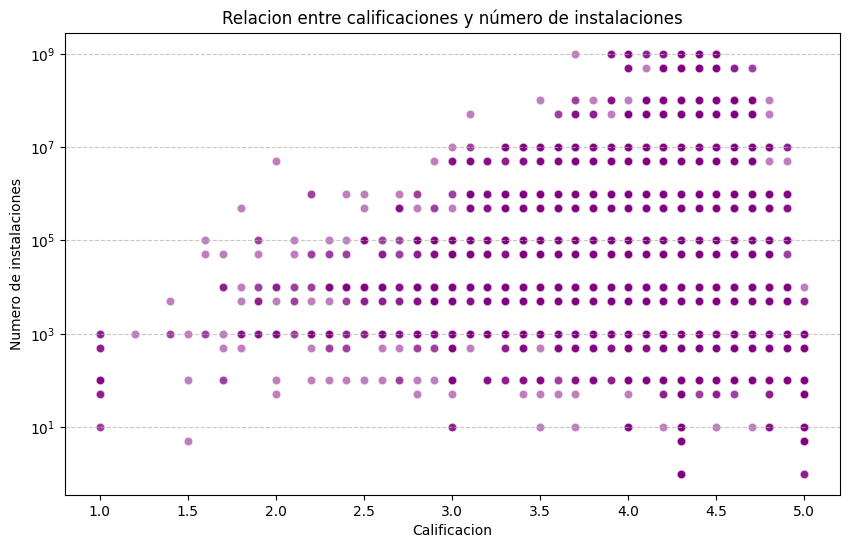

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_apps, x='Rating', y='Installs', alpha=0.5, color = 'purple')
plt.yscale('log')
plt.title('Relacion entre calificaciones y número de instalaciones')
plt.xlabel('Calificacion')
plt.ylabel('Numero de instalaciones')
plt.grid(axis = 'y', linestyle='--', alpha=0.7)
plt.tight_layout
plt.show()

Los puntos están dispersos sin un patrón claro. Diría que no existe una relación fuerte entre ambas variables. 
Voy a hcaer una correlación:

In [53]:
corr = df_apps['Rating'].corr(df_apps['Installs'])
corr

np.float64(0.0448290867417043)

El coeficiente es positivo pero bajísimo, prácticamente despreciable. Ni siquiera diría que hay una relación débil entre la calificación y el número de descargas, sino que diría que no la hay y posiblemente serán otros factores como el marketing o la categoría que tienen más impacto a la hora de descargarse una app.

¿Las apps gratuitas tienen mejores calificaciones que las de pago?

C:\Users\Marian\AppData\Local\Temp\ipykernel_3684\3884634731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_apps, x= 'Type', y='Rating', palette = 'Set2')


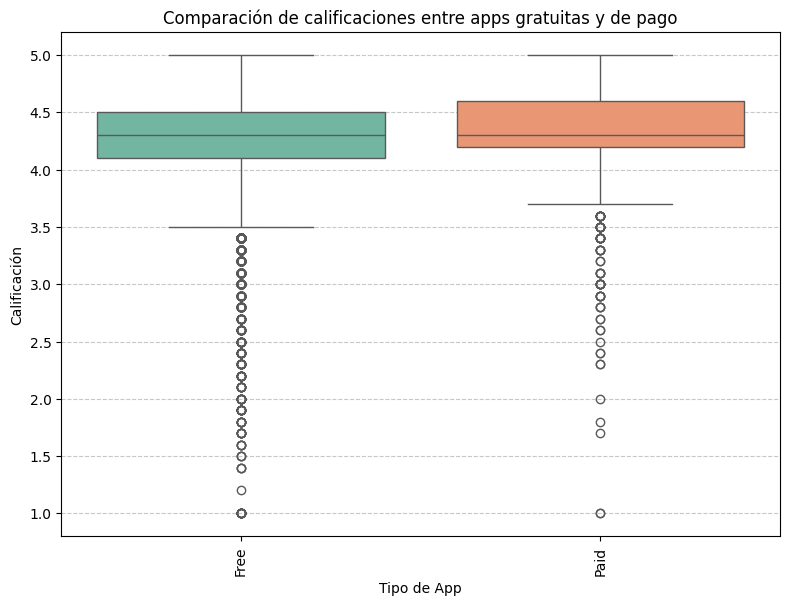

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_apps, x= 'Type', y='Rating', palette = 'Set2')
plt.title('Comparación de calificaciones entre apps gratuitas y de pago')
plt.xlabel('Tipo de App')
plt.ylabel('Calificación')
plt.grid(axis = 'y', linestyle='--', alpha = 0.7)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Vemos que la diferencias en las medianas es prácticamente imperceptible, con lo cual no hay una influecia notable del tipo de app (gratuita o de pago)

In [55]:
avg_ratings = df_apps.groupby('Type')['Rating'].mean()
print('Promedio de calificaciones por tipo de app')
print(avg_ratings)

Promedio de calificaciones por tipo de app
Type
Free    4.19852
Paid    4.26915
Name: Rating, dtype: float64


¿Cuál es la correlación entre el número de instalaciones y el precio?

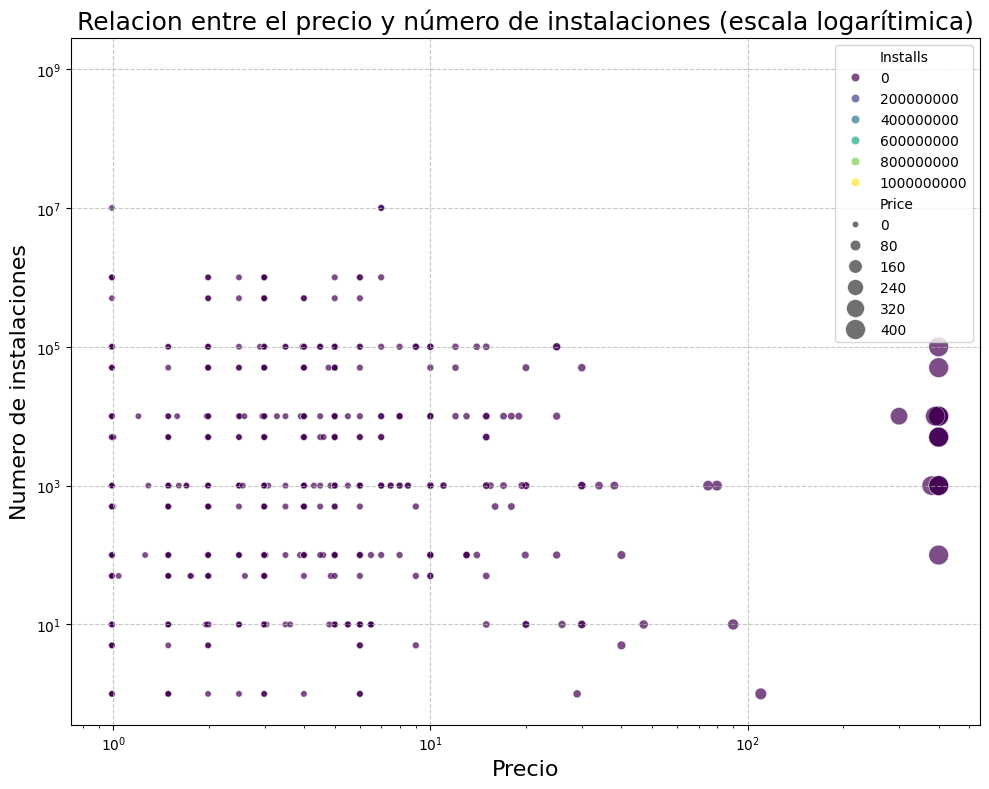

In [56]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_apps, x='Price', y='Installs', hue = 'Installs',
                palette='viridis', size='Price', sizes=(20,200), alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Relacion entre el precio y número de instalaciones (escala logarítimica)', fontsize=18)
plt.xlabel('Precio', fontsize=16)
plt.ylabel('Numero de instalaciones',fontsize=16)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()   
plt.show()

¿Las apps que más duran en el mercado tienen mejores calificaciones?

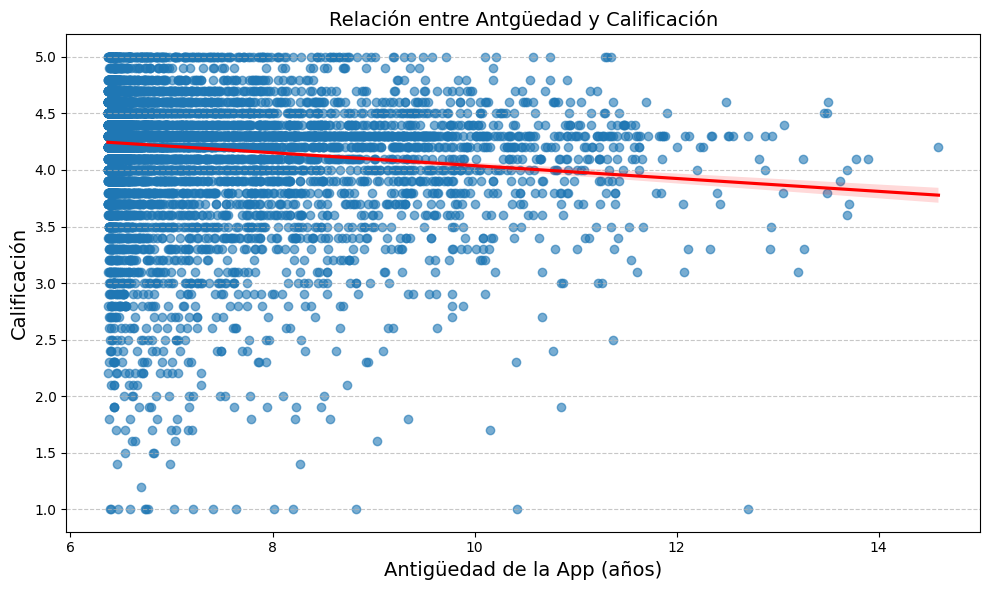

In [57]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_apps, x='App Age (years)', y='Rating', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relación entre Antgüedad y Calificación', fontsize = 14)
plt.xlabel('Antigüedad de la App (años)', fontsize=14)
plt.ylabel('Calificación', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**4. ANÁLISIS MULTIVARIANTE**

¿Qué factores influyen más en las calificaciones?

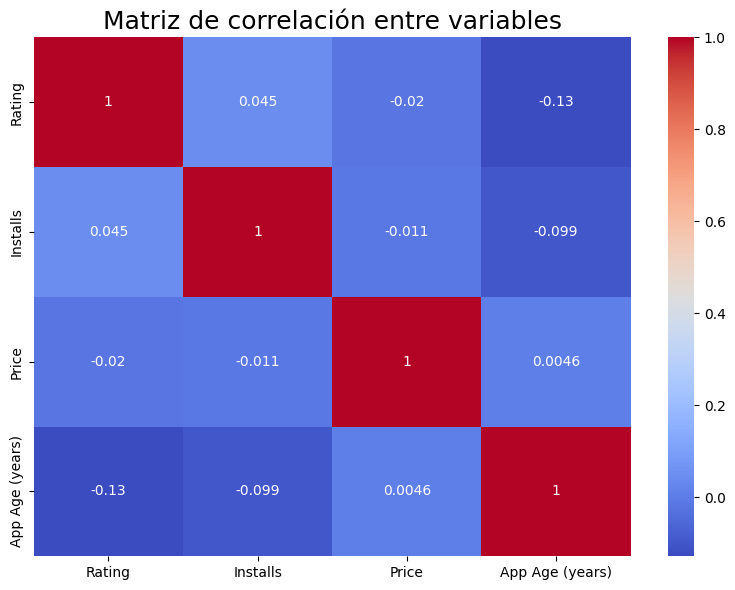

In [58]:
plt.figure(figsize=(8,6))
correlation_matrix = df_apps[['Rating', 'Installs', 'Price', 'App Age (years)']].corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables', fontsize=18)
plt.tight_layout()
plt.show()

¿Qué factores influyen en las apps más exitosas?

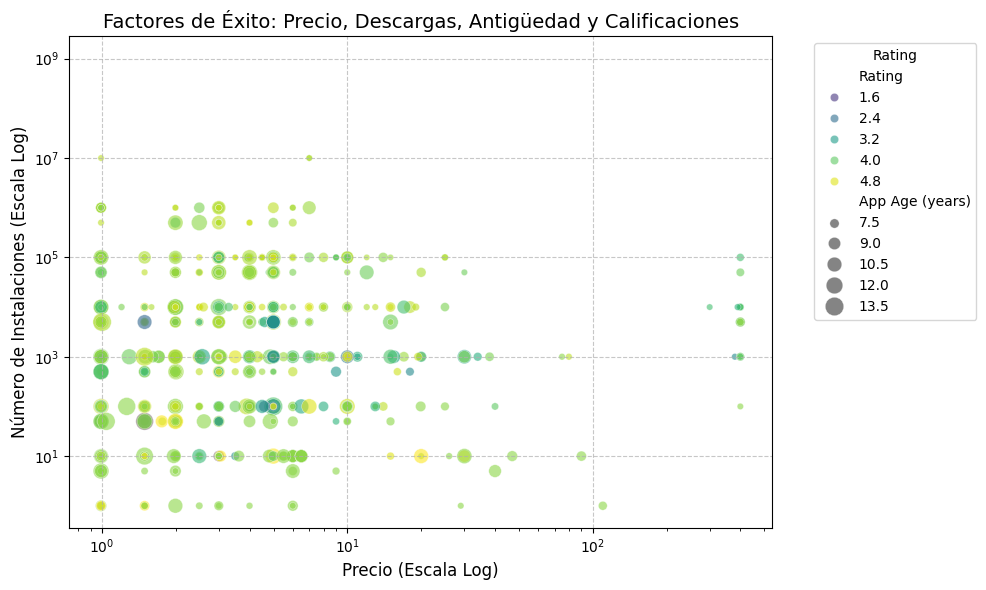

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_apps, 
    x='Price', 
    y='Installs', 
    size='App Age (years)', 
    hue='Rating', 
    alpha=0.6, 
    palette='viridis', 
    sizes=(20, 200)
)
plt.xscale('log')
plt.yscale('log')
plt.title('Factores de Éxito: Precio, Descargas, Antigüedad y Calificaciones', fontsize=14)
plt.xlabel('Precio (Escala Log)', fontsize=12)
plt.ylabel('Número de Instalaciones (Escala Log)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Rating')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


ALGUNOS CÁLCULOS EXTRA PARA LA PRESENTACIÓN Y MEMORIA:

In [60]:
# Porcentaje de apps gratuitas
free_apps_percentage = (df_apps[df_apps['Type'] == 'Free'].shape[0] / df_apps.shape[0]) * 100
print(f"Porcentaje de apps gratuitas: {free_apps_percentage:.2f}%")


Porcentaje de apps gratuitas: 92.61%


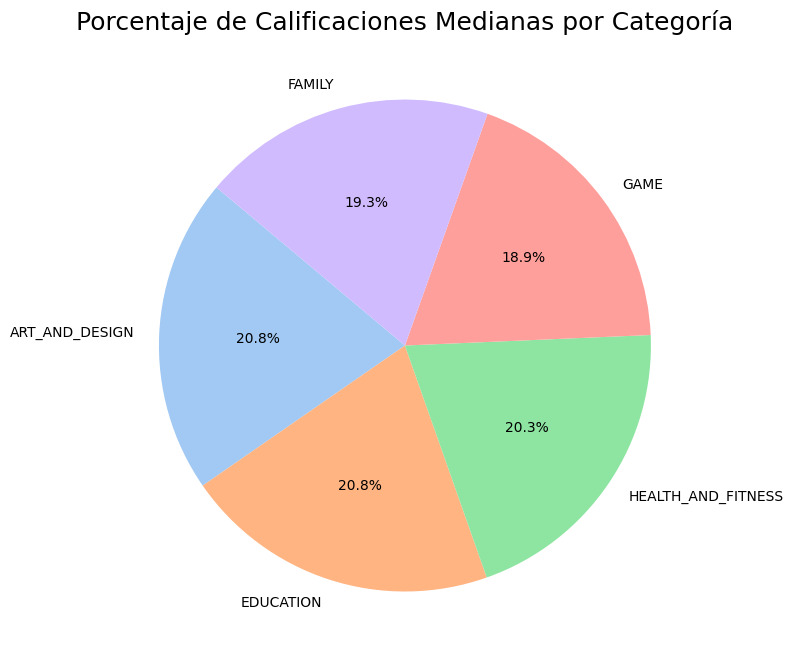

In [61]:
data = {
    "Category": ["ART_AND_DESIGN", "EDUCATION", "HEALTH_AND_FITNESS", "GAME", "FAMILY"],
    "Median_Rating": [4.4, 4.4, 4.3, 4.0, 4.1]
}
df_categories = pd.DataFrame(data)

# Crear el gráfico de tarta para mostrar la proporción de categorías mejor calificadas
colors = sns.color_palette('pastel')[0:5]  # Colores suaves

plt.figure(figsize=(8, 8))
plt.pie(
    df_categories["Median_Rating"], 
    labels=df_categories["Category"], 
    autopct='%1.1f%%', 
    colors=colors,
    startangle=140, 
)
plt.title("Porcentaje de Calificaciones Medianas por Categoría", fontsize=18)
plt.tight_layout()

